Pt = Satellite Transmitter Power (in Decibel Watts, dBw) = 10 dBW
Gt = Satellite Antenna Gain (in Decibel Isotopic, dBi) = 9 dBi
Losses (in Decibels, db) = 19.43 db
ηR = Ground Station Antenna efficiency = 0.55
λ = c/f = Speed of Light/Carrier Frequency (in meters, m) =
0.136363636 m
kb = Boltzmann Constant (in Decibel Watts per degree Kelvin per
Hertz, dBW/K/Hz)= -228.6 dBW/K/Hz
TS = System Noise Temperature (in degrees Kelvin, K) = 22 K

TODO: dr = Ground Station Antenna Diameter (in meters, m)
TODO: R = Slant Range (in kilometers, km)

DSS24 = 34m
DSS34 = 34m
DSS54 = 34m
WPSA = 12m

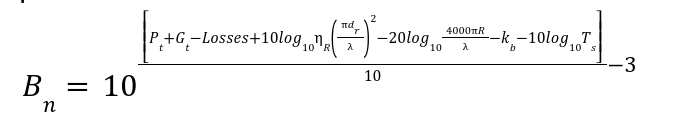

In [1]:
pt = 10
gt = 9
losses = 19.43
nr = 0.55
l = 0.136363636
kb = -228.6
ts = 22
dr = [34,34,34,12]

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

antennadf = pd.read_csv("./data/antenna_plot.csv", index_col=False)
satelitedf = pd.read_csv("./data/starting_data/bonusdata.csv", index_col=False)
time_min = []
for i in range(0, len(antennadf)):
    time_min.append(satelitedf["MISSION ELAPSED TIME (min)"].iloc[i%len(satelitedf)])
antennadf["Time (min)"] = time_min
print(antennadf.shape, satelitedf.shape)

(51924, 6) (12981, 20)


In [3]:
antennadf.head()

,Antenna,Time (sec),X,Y,Z,Time (min)
0,DSS 24,0.000000,6132.732566,5437.728124,3689.829568,0.000000
1,DSS 24,494.188833,5950.505743,5584.040250,3768.834568,8.236481
2,DSS 24,554.188833,5928.055410,5601.314239,3778.567979,9.236481
3,DSS 24,614.188833,5905.535950,5618.481001,3788.331360,10.236481
4,DSS 24,674.188833,5882.947795,5635.540210,3798.124525,11.236481


In [4]:
satelitedf.head()

,MISSION ELAPSED TIME (min),Rx(km)[J2000-EARTH],Ry(km)[J2000-EARTH],Rz(km)[J2000-EARTH],Vx(km/s)[J2000-EARTH],Vy(km/s)[J2000-EARTH],Vz(km/s)[J2000-EARTH],MASS (kg),EARTH Rx(km)[J2000-EARTH],EARTH Ry(km)[J2000-EARTH],EARTH Rz(km)[J2000-EARTH],EARTH Vx(km/s)[J2000-EARTH],EARTH Vy(km/s)[J2000-EARTH],EARTH Vz(km/s)[J2000-EARTH],MOON Rx(km)[J2000-EARTH],MOON Ry(km)[J2000-EARTH],MOON Rz(km)[J2000-EARTH],MOON Vx(km/s)[J2000-EARTH],MOON Vy(km/s)[J2000-EARTH],MOON Vz(km/s)[J2000-EARTH]
0,0.000000,3689.773564,4222.722170,3028.891599,-0.307917,0.268539,0.000720,4592.60000,0,0,0,0,0,0,-315259.8202,211922.4926,121411.1975,-0.632527,-0.667631,-0.346857
1,8.236481,2319.817224,4865.712767,3698.167005,-7.474524,2.142613,2.894977,60129.73972,0,0,0,0,0,0,-315572.1612,211592.3938,121239.6909,-0.631528,-0.668291,-0.347236
2,9.236481,1865.808701,4981.749611,3862.256016,-7.652172,1.724828,2.573246,60129.73972,0,0,0,0,0,0,-315610.0493,211552.2940,121218.8553,-0.631407,-0.668371,-0.347283
3,10.236481,1402.384261,5072.667625,4006.812686,-7.788451,1.305814,2.244322,60129.73972,0,0,0,0,0,0,-315647.9300,211512.1894,121198.0170,-0.631285,-0.668451,-0.347329
4,11.236481,932.010471,5138.480400,4131.480818,-7.883949,0.888450,1.910702,60129.73972,0,0,0,0,0,0,-315685.8035,211472.0799,121177.1759,-0.631164,-0.668531,-0.347375


In [5]:
slantdistance = []
X = []
Y = []
Z = []
for i in range(antennadf.shape[0]):
    satrow = satelitedf.iloc[i%12981][["Rx(km)[J2000-EARTH]","Ry(km)[J2000-EARTH]","Rz(km)[J2000-EARTH]"]]
    X.append(satrow["Rx(km)[J2000-EARTH]"])
    Y.append(satrow["Ry(km)[J2000-EARTH]"])
    Z.append(satrow["Rz(km)[J2000-EARTH]"])
    antrow = antennadf.iloc[i][["X","Y","Z"]]
    slantdistance.append(np.sqrt((antrow["X"]-satrow["Rx(km)[J2000-EARTH]"])**2 + (antrow["Y"]-satrow["Ry(km)[J2000-EARTH]"])**2 + (antrow["Z"]-satrow["Rz(km)[J2000-EARTH]"])**2))

In [6]:
antennae_names = ["DSS24", "DSS34", "DSS54", "WPSA"]

slant_distance_df = pd.DataFrame()
slant_distance_df["Time (min)"] = antennadf["Time (min)"]
slant_distance_df["Antenna Names"] = [antennae_names[int(i/12981)] for i in range(antennadf.shape[0])]
slant_distance_df["Slant Distance (km)"] = slantdistance
slant_distance_df["Antenna X"] = antennadf["X"]
slant_distance_df["Antenna Y"] = antennadf["Y"]
slant_distance_df["Antenna Z"] = antennadf["Z"]
slant_distance_df["Satellite X"] = X
slant_distance_df["Satellite Y"] = Y
slant_distance_df["Satellite Z"] = Z
slant_distance_df.to_csv("./data/slant_distance_offnominal.csv", index=False)

slant_distance_df.head()

,Time (min),Antenna Names,Slant Distance (km),Antenna X,Antenna Y,Antenna Z,Satellite X,Satellite Y,Satellite Z
0,0.000000,DSS24,2807.334528,6132.732566,5437.728124,3689.829568,3689.773564,4222.722170,3028.891599
1,8.236481,DSS24,3701.741131,5950.505743,5584.040250,3768.834568,2319.817224,4865.712767,3698.167005
2,9.236481,DSS24,4110.074493,5928.055410,5601.314239,3778.567979,1865.808701,4981.749611,3862.256016
3,10.236481,DSS24,4541.367797,5905.535950,5618.481001,3788.331360,1402.384261,5072.667625,4006.812686
4,11.236481,DSS24,4986.980576,5882.947795,5635.540210,3798.124525,932.010471,5138.480400,4131.480818


In [7]:
def elevation_angle(satellite_coords, antenna_coords):
    r_s = np.array(satellite_coords)
    r_a = np.array(antenna_coords)
    
    #dot product
    dot_product = np.dot(r_s, r_a)
    
    #magnitude of r_a
    mag_r_a = np.linalg.norm(r_a)
    
    #distance between the satellite and the antenna
    distance = np.linalg.norm(r_s - r_a)
    
    #elevation angle in radians
    elevation = np.arcsin((dot_product - mag_r_a**2)/(distance*mag_r_a))
    return np.degrees(elevation)

![image.png](attachment:image.png)

In [8]:
linkbudget = [[] for i in range(4)]
elevation_angles = [[] for i in range(4)]
elevation_angles_tf = [[] for i in range(4)]
for i in range(antennadf.shape[0]):
    toppart = pt+gt-losses+10*np.log10(nr*((np.pi*dr[int(i/12981)]/l)**2))-20*np.log10(4000*np.pi*slantdistance[i]/l)-kb-10*np.log10(ts)
    exponent = (toppart/10)-3

    scoords = np.array([slant_distance_df.iloc[i]["Satellite X"], slant_distance_df.iloc[i]["Satellite Y"], slant_distance_df.iloc[i]["Satellite Z"]]*1000)
    acoords = np.array([slant_distance_df.iloc[i]["Antenna X"], slant_distance_df.iloc[i]["Antenna Y"], slant_distance_df.iloc[i]["Antenna Z"]]*1000)
    ea = elevation_angle(scoords, acoords)
    elevation_angles[int(i/12981)].append(ea)

    if (ea > 0):
        linkbudget[int(i/12981)].append(10**exponent)
        elevation_angles_tf[int(i/12981)].append(1)
    else:
        linkbudget[int(i/12981)].append(0)
        elevation_angles_tf[int(i/12981)].append(0)


# for i in range(len (linkbudget)):
#     if linkbudget[i] <10000:

In [9]:
antennae_names = ["DSS24", "DSS34", "DSS54", "WPSA"]
antenna_available = [{} for i in range(12981)]
for i in range(12981):
    temp = []
    # minimum = np.float64(18446744073709551615.0)
    for j in range(4):
        if (linkbudget[j][i] > 0 and linkbudget[j][i] <= 10000):
            temp.append(linkbudget[j][i])
        elif (linkbudget[j][i] > 10000):
            temp.append(np.float64(10000))
        # print (linkbudget[j][i])
    # print(temp)
    if (len(temp) == 0):
        temp = [0]
    name = antennae_names[temp.index(max(temp))]
    antenna_available[i][name] = max(temp)
print(antenna_available)

[{'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS24': 0}, {'DSS

In [10]:
for i in range(4):
    link_budget_df = pd.DataFrame()
    link_budget_df["Time (min)"] = antennadf["Time (min)"].iloc[:12981]
    link_budget_df["Link Budget (kbps)"] = linkbudget[i]
    link_budget_df["Line Of Sight (1/0)"] = elevation_angles_tf[i]
    link_budget_df["Line Of Sight (deg)"] = elevation_angles[i]
    # print(antennadf.iloc[12981*i:12981*(i+1)]["X"])
    link_budget_df["Antenna X"] = antennadf["X"].to_list()[12981*i:12981*(i+1)]
    link_budget_df["Antenna Y"] = antennadf["Y"].to_list()[12981*i:12981*(i+1)]
    link_budget_df["Antenna Z"] = antennadf["Z"].to_list()[12981*i:12981*(i+1)]
    link_budget_df["Satellite X"] = X[12981*i:12981*(i+1)]
    link_budget_df["Satellite Y"] = Y[12981*i:12981*(i+1)]
    link_budget_df["Satellite Z"] = Z[12981*i:12981*(i+1)]
    link_budget_df["Slant Distance (km)"] = slantdistance[12981*i:12981*(i+1)]
    print(link_budget_df.head())
    link_budget_df.to_csv("./data/link_budget_offnominal_"+antennae_names[i]+".csv", index=False)

# link_budget_df.head()

   Time (min)  Link Budget (kbps)  Line Of Sight (1/0)  Line Of Sight (deg)  \
0    0.000000                 0.0                    0           -72.212725   
1    8.236481                 0.0                    0           -51.064950   
2    9.236481                 0.0                    0           -47.494661   
3   10.236481                 0.0                    0           -44.936809   
4   11.236481                 0.0                    0           -43.157648   

     Antenna X    Antenna Y    Antenna Z  Satellite X  Satellite Y  \
0  6132.732566  5437.728124  3689.829568  3689.773564  4222.722170   
1  5950.505743  5584.040250  3768.834568  2319.817224  4865.712767   
2  5928.055410  5601.314239  3778.567979  1865.808701  4981.749611   
3  5905.535950  5618.481001  3788.331360  1402.384261  5072.667625   
4  5882.947795  5635.540210  3798.124525   932.010471  5138.480400   

   Satellite Z  Slant Distance (km)  
0  3028.891599          2807.334528  
1  3698.167005          3701

In [11]:
antenna_availability = pd.DataFrame()
# COLUMNS: TIME, ANTENNA XYZ, AVAILABLE SATELLITE NAME, SATELLITE XYZ, Link Budget
antenna_availability["Time (min)"] = antennadf["Time (min)"].iloc[:12981]
link_budget_df["Antenna X"] = antennadf["X"].to_list()[:12981]
link_budget_df["Antenna Y"] = antennadf["Y"].to_list()[:12981]
link_budget_df["Antenna Z"] = antennadf["Z"].to_list()[:12981]
aakeys = []
for i in range(len(antenna_available)):
    aakeys.append(list(antenna_available[i].keys())[0])

aavalues = []
for i in range(len(antenna_available)):
    aavalues.append(list(antenna_available[i].values())[0])
antenna_availability["Available Satellite"] = aakeys
antenna_availability["Link Budget (kbps)"] = aavalues
antenna_availability["Satellite X"] = satelitedf["Rx(km)[J2000-EARTH]"]
antenna_availability["Satellite Y"] = satelitedf["Ry(km)[J2000-EARTH]"]
antenna_availability["Satellite Z"] = satelitedf["Rz(km)[J2000-EARTH]"]
print(antenna_availability.head())
antenna_availability.to_csv("./data/antenna_availability_offnominal.csv", index=False)

satelitedf["DS24_link_budget"] = linkbudget[0]
satelitedf["DS34_link_budget"] = linkbudget[1]
satelitedf["DS54_link_budget"] = linkbudget[2]
satelitedf["WPSA_link_budget"] = linkbudget[3]
satelitedf.to_csv("./data/bonusdata_altered.csv", index=False)

   Time (min) Available Satellite  Link Budget (kbps)  Satellite X  \
0    0.000000               DSS24                 0.0  3689.773564   
1    8.236481               DSS24                 0.0  2319.817224   
2    9.236481               DSS24                 0.0  1865.808701   
3   10.236481               DSS24                 0.0  1402.384261   
4   11.236481               DSS24                 0.0   932.010471   

   Satellite Y  Satellite Z  
0  4222.722170  3028.891599  
1  4865.712767  3698.167005  
2  4981.749611  3862.256016  
3  5072.667625  4006.812686  
4  5138.480400  4131.480818  


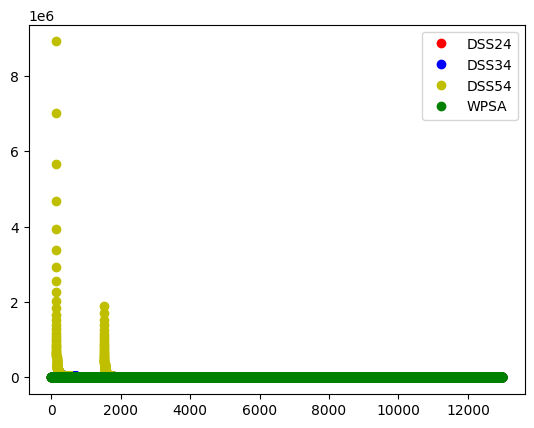

In [12]:
# plt.plot(antennadf["Time (min)"])
plt.plot(antennadf["Time (min)"].iloc[:12981], linkbudget[0], 'ro', label = antennae_names[0])
plt.plot(antennadf["Time (min)"].iloc[:12981], linkbudget[1], 'bo', label = antennae_names[1])
plt.plot(antennadf["Time (min)"].iloc[:12981], linkbudget[2], 'yo', label = antennae_names[2])
plt.plot(antennadf["Time (min)"].iloc[:12981], linkbudget[3], 'go', label = antennae_names[3])
plt.legend()
plt.show()

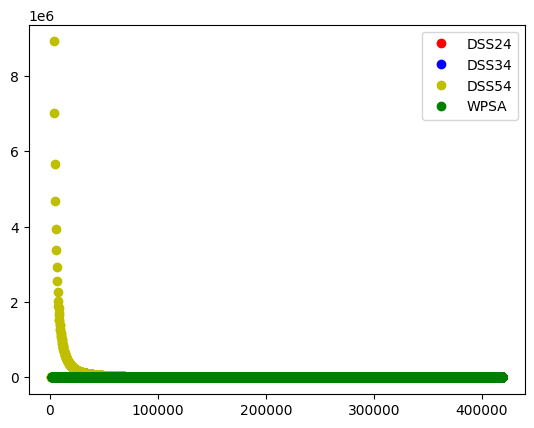

In [13]:
plt.plot(slantdistance[:12981], linkbudget[0], 'ro', label = antennae_names[0])
plt.plot(slantdistance[12981:12981*2], linkbudget[1], 'bo', label = antennae_names[1])
plt.plot(slantdistance[12981*2:12981*3], linkbudget[2], 'yo', label = antennae_names[2])
plt.plot(slantdistance[12981*3:12981*4], linkbudget[3], 'go', label = antennae_names[3])
plt.legend()
plt.show()

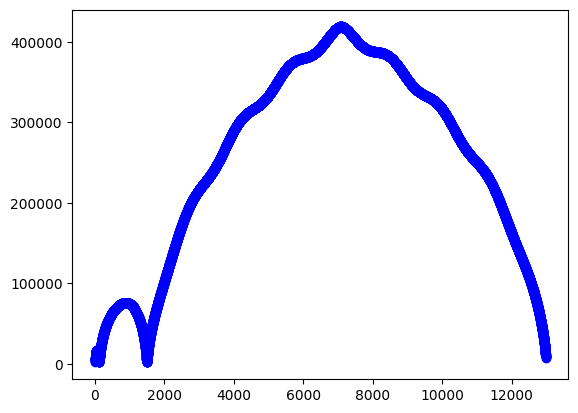

In [14]:
# plt.plot(antennadf["Time (min)"])
plt.plot(antennadf["Time (min)"].iloc[:12981], slantdistance[:12981], 'bo')
plt.show()